# Full EDA on `The Movies Dataset`

In this notebook we will dive into each dataset that we have and try to show these:

- Genre:
- - Mean Popularity
  - Movie Frequence
  - Avg Revenue
  - Avg Vote Count
  - Vote Avg
  - Avg Budget
- Production Companies
- - Per Director
  - Frequency of N Directors
  - Avg Revenue
  - Movie Counts
- Movies
- - Popularity
  - Runtime Distribution
  - Revenue Per Decade
- Some Questions
- - Is there a correlation between revenue and budget?
- - Is there a correlation between popularity and revenue?
- - Is there a correlation between popularity and runtime?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval # use literal eval instead of eval

In [2]:
credits = pd.read_csv('../dataset/credits.csv')
keywords = pd.read_csv('../dataset/keywords.csv')
links = pd.read_csv('../dataset/links.csv')
md = pd.read_csv('../dataset/movies_metadata.csv')
ratings = pd.read_csv('../dataset/ratings.csv')

/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_27850/2838257103.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  md = pd.read_csv('../dataset/movies_metadata.csv')


In [3]:
bad_data = md[md['imdb_id'] == '0'].index
md.drop(bad_data, inplace=True)

In [5]:
md['genres'] = md['genres'].apply(literal_eval)
md['production_companies'] = md['production_companies'].fillna('[]').apply(literal_eval)

In [6]:
cols_to_float = ['revenue', 'vote_count', 'vote_average', 'budget', 'popularity']
md[cols_to_float] = md[cols_to_float].astype(float)

# Per Genre

As we know each movie could have multiple genres, for finding popularity for each genre i have to idea to calculate it:
#### Full Attribution
In this appraoch we would compute the movie popularity for all of it's genres, but this could have overcounting bias for us.

#### Proportional Attribution
In this approach, popularity of a movie would divided by the number of genres, in this way we have a normalized popularity for multi genres.

So i use proportional attribution

In [13]:
# Filter in a single boolean mask
md_genre = md[
    (md['revenue'] > 0) &
    (md['budget'] > 0) &
    (md['genres'].str.len() > 0)
].copy()


genre_len = md_genre['genres'].str.len()
metrics = {
    'popularity': 'pop_per_genre',
    'revenue': 'rev_per_genre',
    'vote_count': 'vote_count_per_genre',
    'vote_average': 'vote_avg_per_genre',
    'budget': 'budget_per_genre'
}
for col, new_col in metrics.items():
    md_genre[new_col] = md_genre[col] / genre_len

md_genre = md_genre.explode('genres', ignore_index=True)
md_genre['genre_name'] = md_genre['genres'].apply(lambda g: g['name'])

md_genre.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,pop_per_genre,rev_per_genre,vote_count_per_genre,vote_avg_per_genre,budget_per_genre,genre_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"{'id': 16, 'name': 'Animation'}",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,7.315648,124518011.0,1805.0,2.566667,10000000.0,Animation
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"{'id': 35, 'name': 'Comedy'}",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,7.315648,124518011.0,1805.0,2.566667,10000000.0,Comedy


## Mean Popularity

In [16]:
population_per_genre = md_genre.groupby('genre_name')['pop_per_genre'].mean().sort_values()

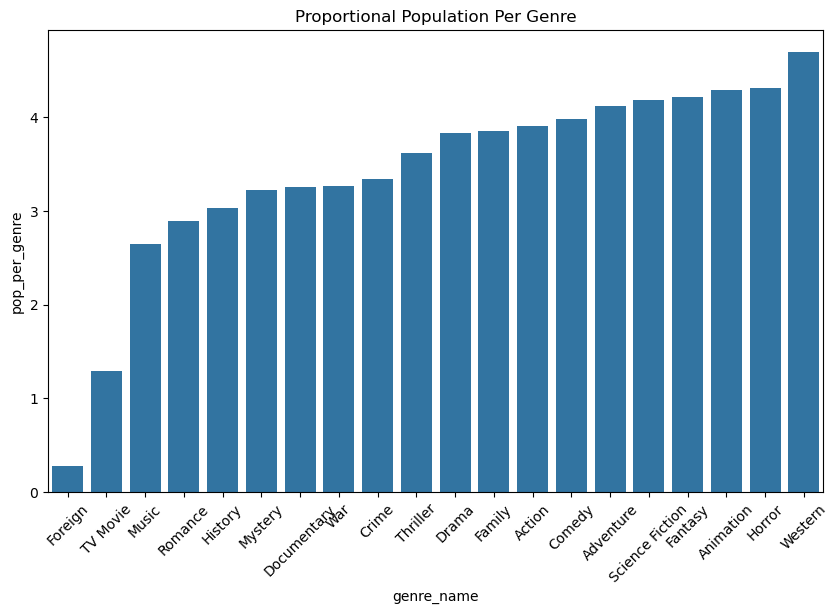

In [30]:
plt.figure(figsize=(10, 6))

sns.barplot(population_per_genre)

plt.title('Proportional Population Per Genre')

plt.xticks(rotation=45)
plt.show()

#### Intuition:

From the above plot we could see that `Adventure` genre have the most population and `Foregin` has the least population.

## Movie Frequency

For this we use our previous proportional appraoch.

In [37]:
movie_count_per_genre = md_genre['genre_name'].value_counts().sort_values()

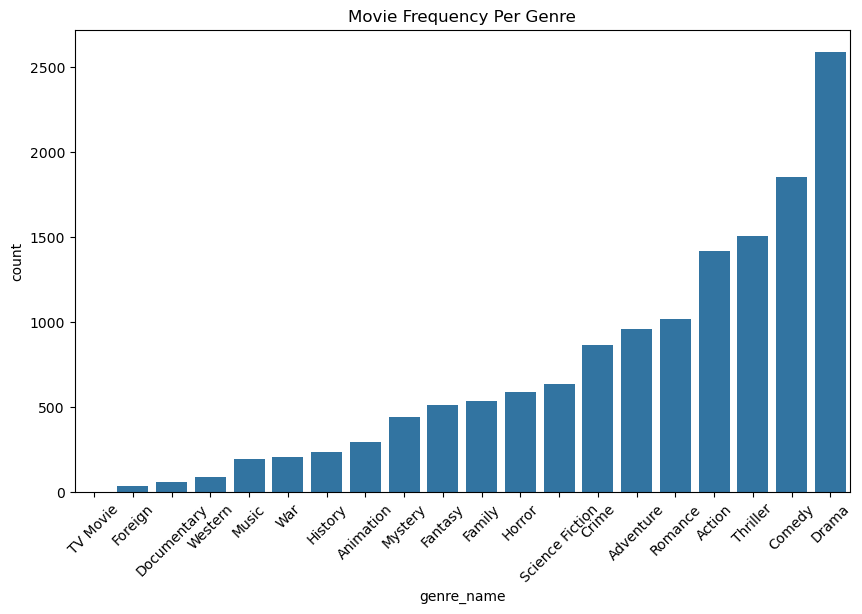

In [39]:
plt.figure(figsize=(10, 6))

sns.barplot(movie_count_per_genre)

plt.title('Movie Frequency Per Genre')

plt.xticks(rotation=45)
plt.show()

#### Intuition:
As `Adventure` have the mose popularity, but there is no much of a movie from them. sad :( 

Also `Drama` have the mose number of movies and `TV Movie` has the least.

## Avg Revenue

In [42]:
rev_per_genre = md_genre.groupby('genre_name')['rev_per_genre'].mean().sort_values()

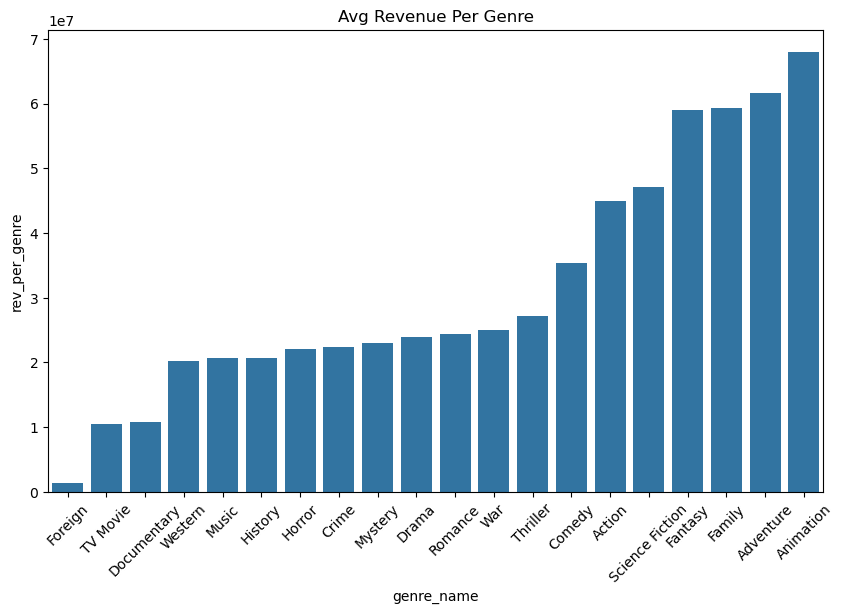

In [44]:
plt.figure(figsize=(10, 6))

sns.barplot(rev_per_genre)

plt.title('Avg Revenue Per Genre')

plt.xticks(rotation=45)
plt.show()

#### Intuition:
Oh, `Adventure` have the mose revenue, as it have a the most popularity

## Avg Vote Count

In [ ]:
avg_vote_count = md_genre.groupby('genre_name')['vote_count_per_genre'].mean().sort_values()

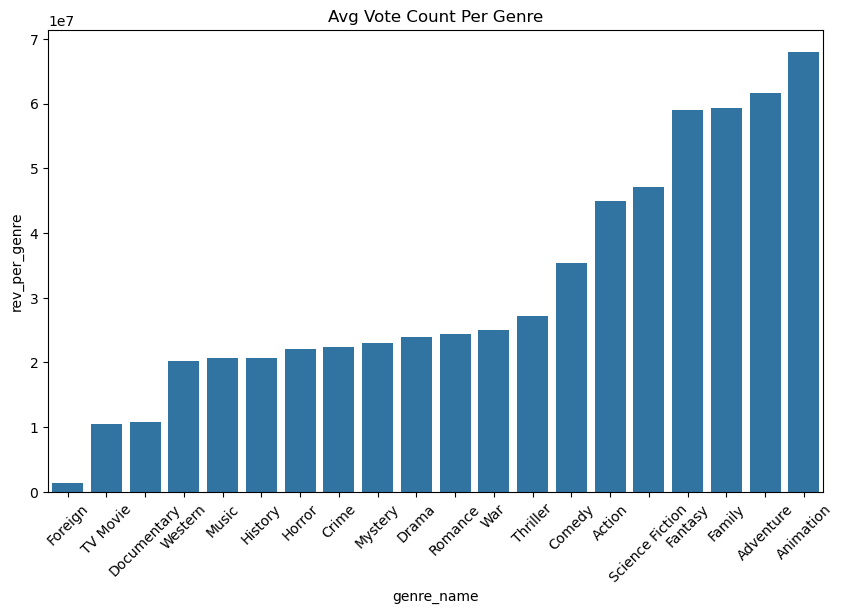

In [53]:
plt.figure(figsize=(10, 6))

sns.barplot(rev_per_genre)

plt.title('Avg Vote Count Per Genre')

plt.xticks(rotation=45)
plt.show()

## Vote Avg

In [63]:
vote_avg = md_genre.groupby('genre_name')['vote_avg_per_genre'].mean().sort_values()

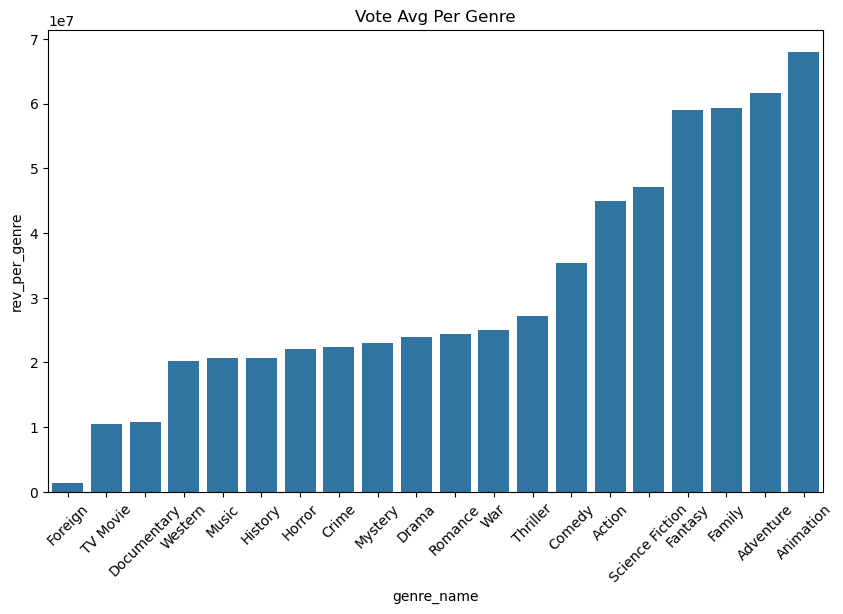

In [65]:
plt.figure(figsize=(10, 6))

sns.barplot(rev_per_genre)

plt.title('Vote Avg Per Genre')

plt.xticks(rotation=45)
plt.show()

In [418]:
avg_budget = md_genre.groupby('genre_name')['budget_per_genre'].mean().sort_values()

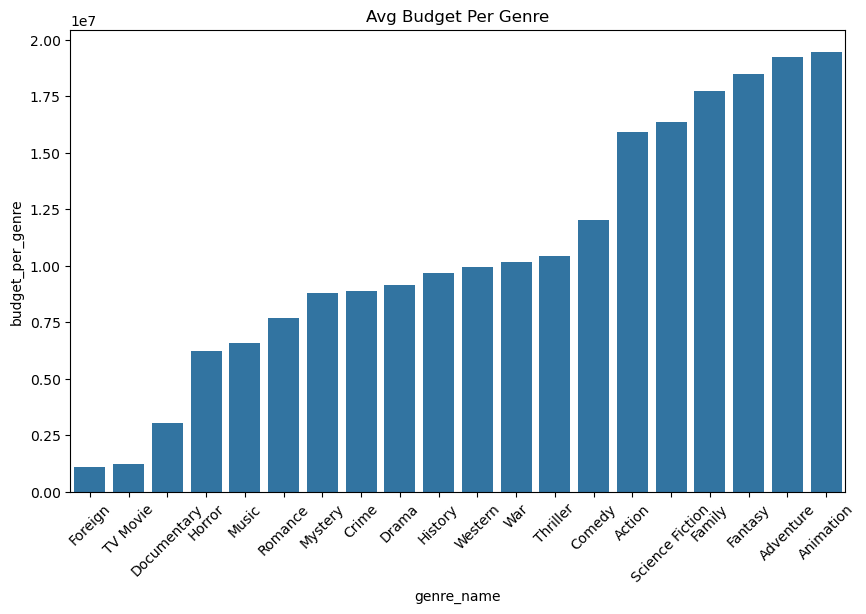

In [420]:
plt.figure(figsize=(10, 6))

sns.barplot(avg_budget)

plt.title('Avg Budget Per Genre')

plt.xticks(rotation=45)
plt.show()

# Production Companies

In [125]:
md_pc = md[
    (md['revenue'] > 0) &
    (md['genres'].str.len() > 0) &
    (md['production_companies'].str.len() > 0)
]

md_pc['revenue_per_pc'] = md['revenue'] / md['production_companies'].str.len()

md_pc =  md_pc.explode('production_companies', ignore_index=True)
md_pc['pc_name'] = md_pc['production_companies'].apply(lambda pc: pc['name'])

/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_27850/2539416429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_pc['revenue_per_pc'] = md['revenue'] / md['production_companies'].str.len()


In [139]:
top_k = 20

avg_revenue_per_pc = md_pc.groupby('pc_name')['revenue_per_pc'].mean().sort_values(ascending=False)[:top_k]

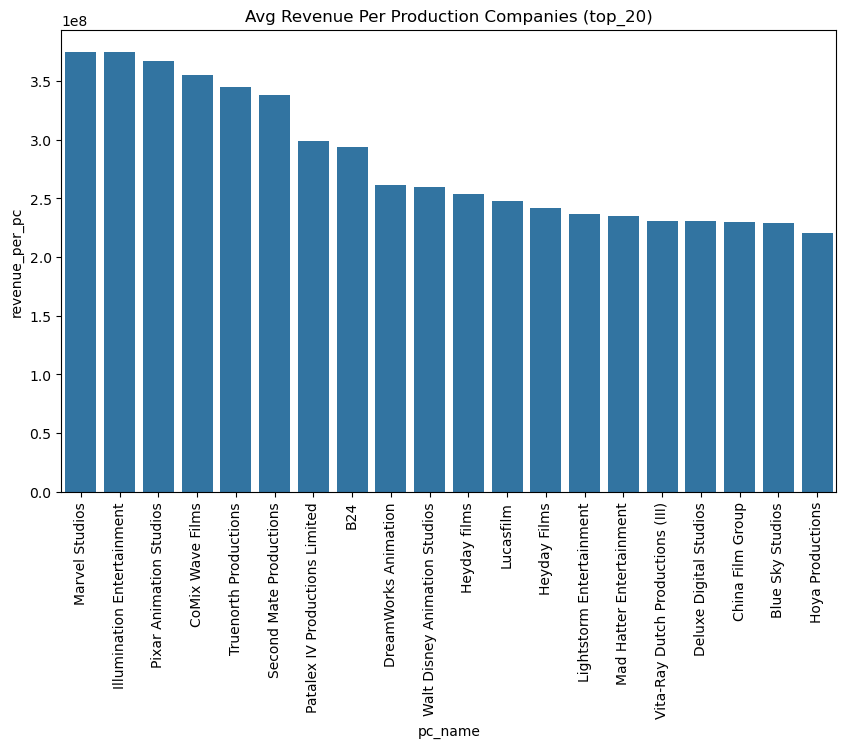

In [143]:
plt.figure(figsize=(10, 6))

sns.barplot(avg_revenue_per_pc)

plt.title(f'Avg Revenue Per Production Companies (top_{top_k})')

plt.xticks(rotation=90)
plt.show()

# Per Director

In [169]:
credits['id'] = credits['id'].astype(int)
md['id'] = md['id'].astype(int)


In [175]:
md_w_crew = md.merge(credits)
md_w_crew['crew'] = md_w_crew['crew'].apply(literal_eval)

In [183]:
md_w_crew['directors'] = md_w_crew['crew'].apply(
    lambda x: 
        [director['name'] for director in
         filter(lambda crew_data: crew_data['job'] == 'Director', x)]
)

## Frequency of N Directors

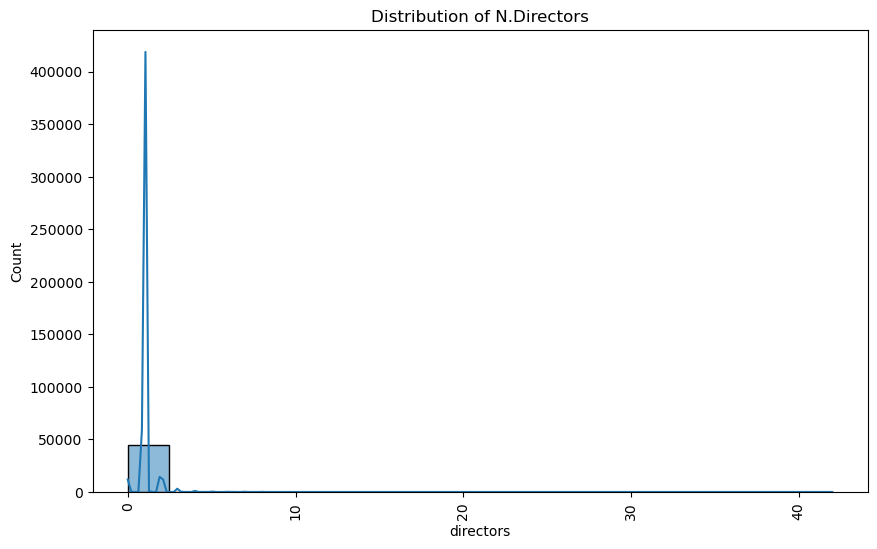

In [200]:
plt.figure(figsize=(10, 6))

n_directors = md_w_crew['directors'].apply(lambda x: len(x))

sns.histplot(n_directors, kde=True)

plt.title(f'Distribution of N.Directors')

plt.xticks(rotation=90)
plt.show()

## Avg Revenue

In [205]:
md_w_crew = md_w_crew.explode('directors')

In [213]:
top_k = 20

avg_revenue_per_director = md_w_crew.groupby('directors')['revenue'].mean().dropna().sort_values(ascending=False)[:20]

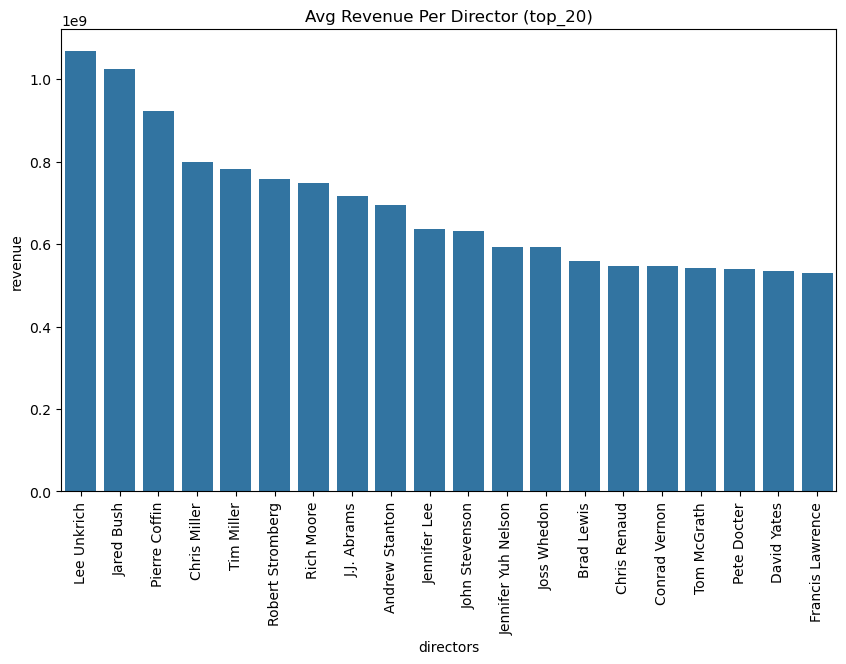

In [215]:
plt.figure(figsize=(10, 6))

sns.barplot(avg_revenue_per_director)

plt.title(f'Avg Revenue Per Director (top_{top_k})')

plt.xticks(rotation=90)
plt.show()

In [217]:
top_k = 20

avg_popularity_per_director = md_w_crew.groupby('directors')['popularity'].mean().dropna().sort_values(ascending=False)[:20]

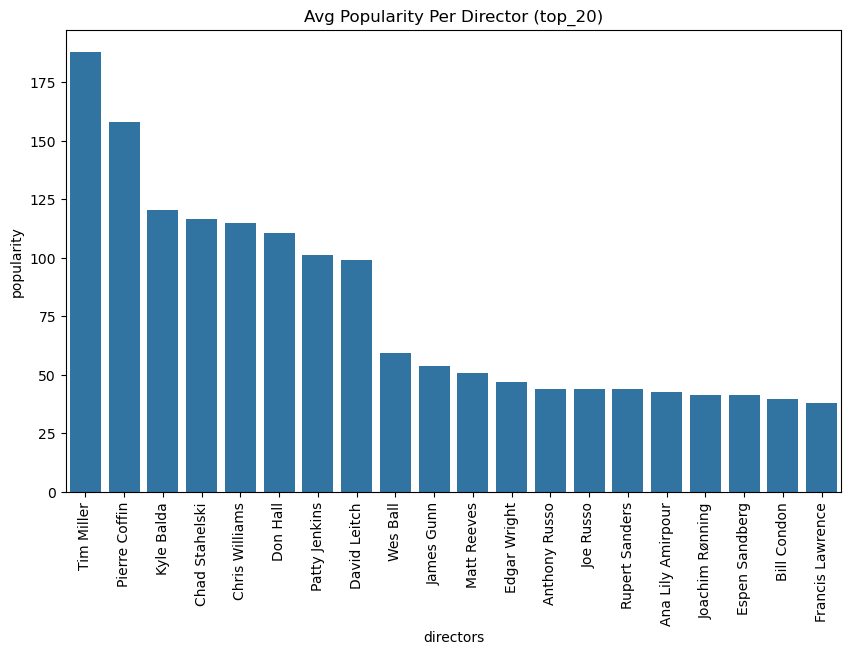

In [219]:
plt.figure(figsize=(10, 6))

sns.barplot(avg_popularity_per_director)

plt.title(f'Avg Popularity Per Director (top_{top_k})')

plt.xticks(rotation=90)
plt.show()

## Movie Counts

In [229]:
top_k = 20

movie_count_per_director = md_w_crew['directors'].value_counts().sort_values(ascending=False)[:20]

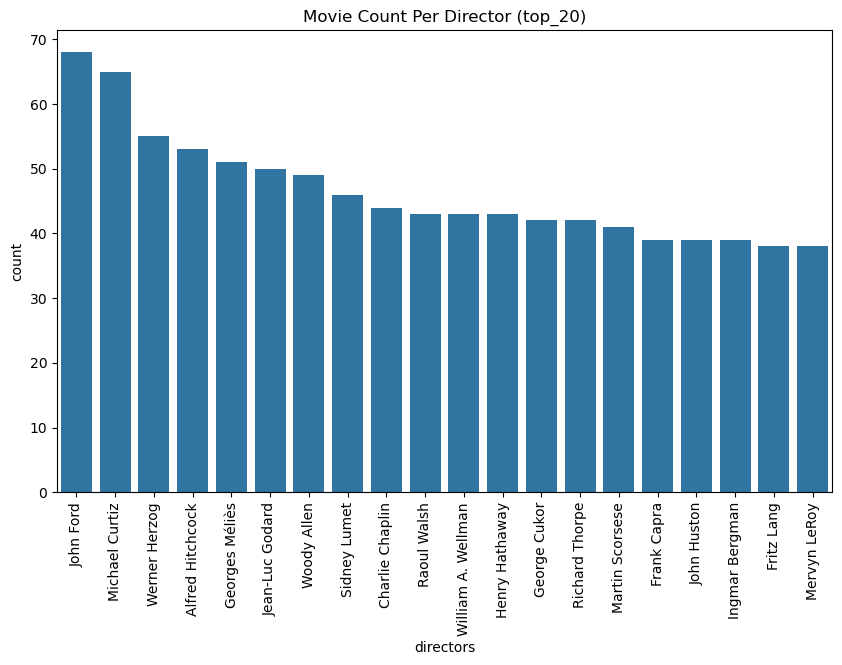

In [231]:
plt.figure(figsize=(10, 6))

sns.barplot(movie_count_per_director)

plt.title(f'Movie Count Per Director (top_{top_k})')

plt.xticks(rotation=90)
plt.show()

# Movies

## Release

In [265]:
md_movies = md.copy()
md_movies['released_year'] = md_movies['release_date'].dropna().apply(lambda x: int(x.split('-')[0])).dropna()
md_movies['released_month'] = md_movies['release_date'].dropna().apply(lambda x: int(x.split('-')[1])).dropna()

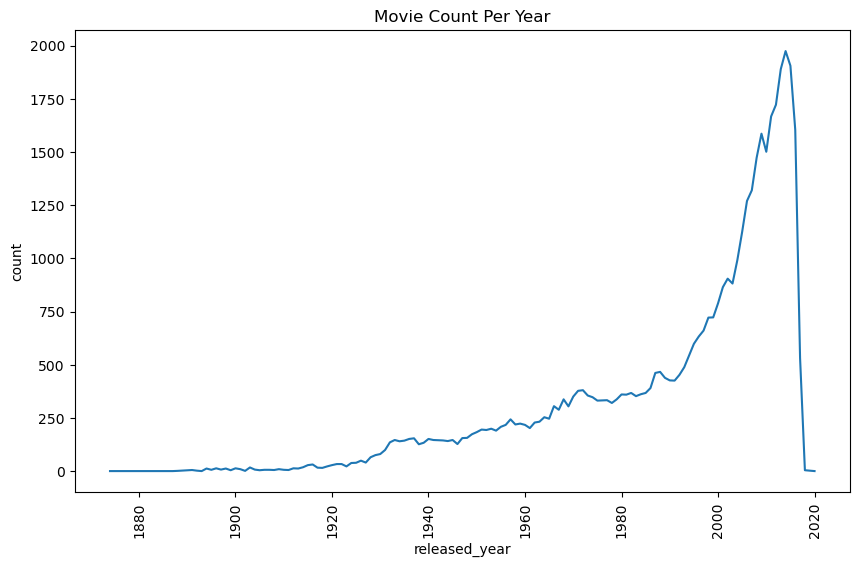

In [287]:
plt.figure(figsize=(10, 6))

sns.lineplot(md_movies['released_year'].value_counts())

plt.title(f'Movie Count Per Year')

plt.xticks(rotation=90)
plt.show()

## Popularity

In [327]:
top_k = 20

popular_movies = md_movies.sort_values(by='popularity', ascending=False)[:top_k]

In [333]:
popular_movies = popular_movies[['popularity', 'title']].set_index('title')

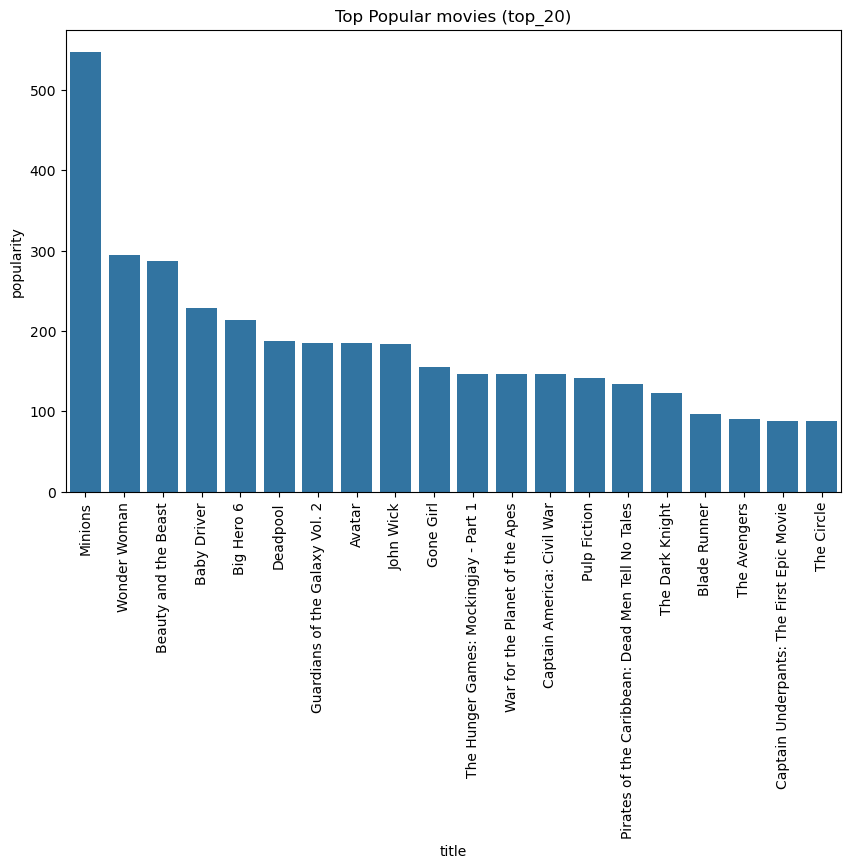

In [347]:
plt.figure(figsize=(10, 6))

sns.barplot(x=popular_movies.index, y=popular_movies['popularity'])

plt.title(f'Top Popular movies (top_{top_k})')

plt.xticks(rotation=90)
plt.show()

## Runtime Distribution

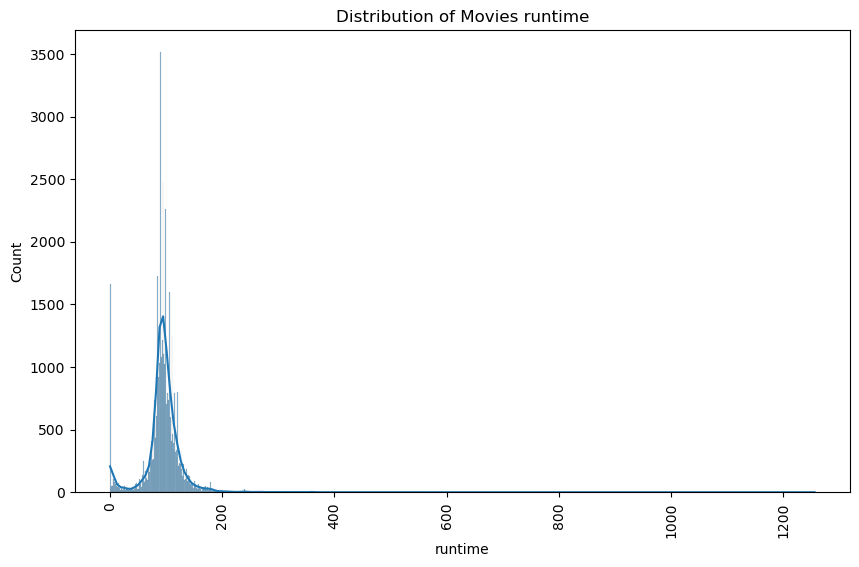

In [358]:
plt.figure(figsize=(10, 6))

sns.histplot(md_movies['runtime'], kde=True)

plt.title(f'Distribution of Movies runtime')

plt.xticks(rotation=90)
plt.show()

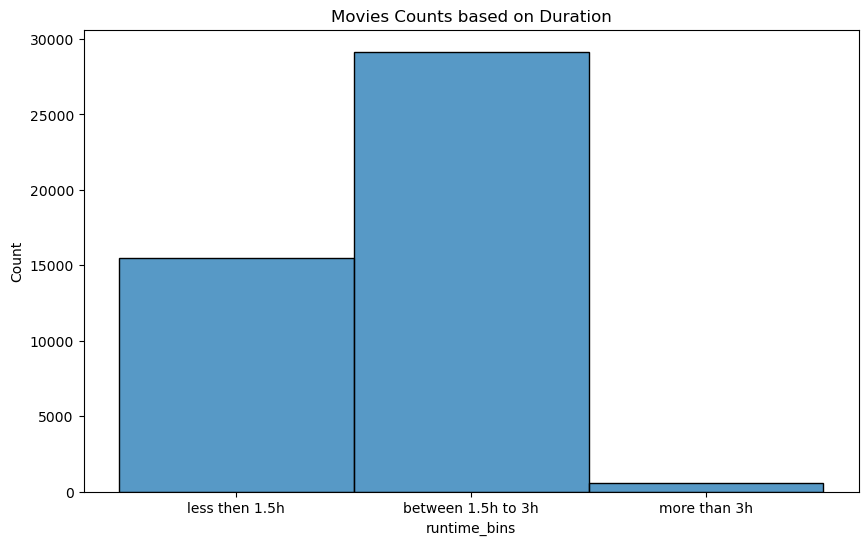

In [364]:
# 0 to 1.5h
# 1.5 to 3h
# 3h to ...
bins = [0, 90, 180, float('inf')]
labels = ['less then 1.5h', 'between 1.5h to 3h', 'more than 3h']

md_movies['runtime_bins'] = pd.cut(md_movies['runtime'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))

sns.histplot(md_movies['runtime_bins'])

plt.title(f'Movies Counts based on Duration')
plt.show()

## Revenue per decade

In [371]:
md_movies['decade'] = (md_movies['released_year'] // 10) * 10

In [375]:
rev_per_decade = md_movies.groupby('decade')['revenue'].mean()

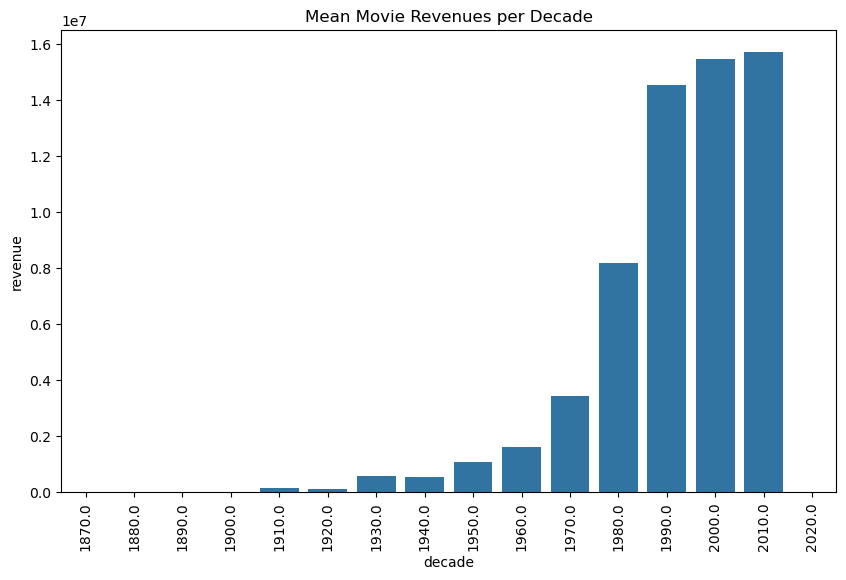

In [395]:
plt.figure(figsize=(10, 6))

sns.barplot(rev_per_decade)

plt.title(f'Mean Movie Revenues per Decade')

plt.xticks(rotation=90)
plt.show()

# Some Questions

## Is there a **Linear Correlation** between revenue and budget ? 

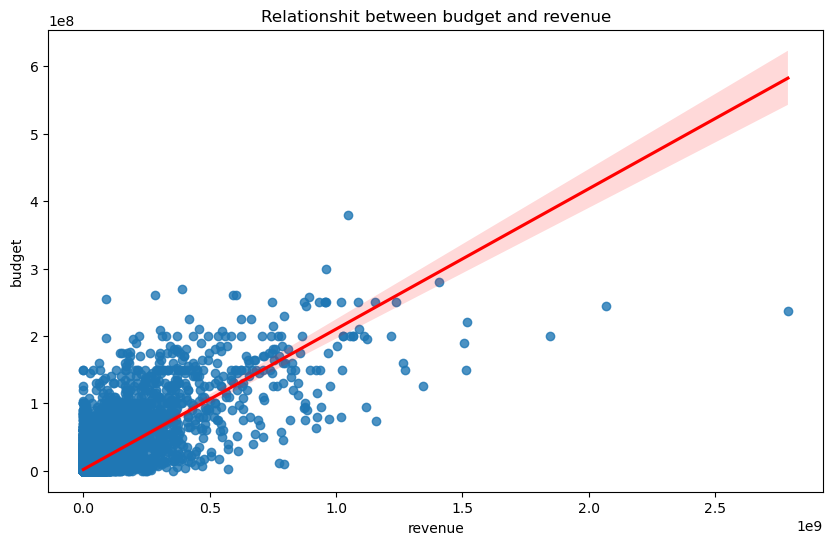

In [407]:
plt.figure(figsize=(10, 6))

sns.regplot(x=md['revenue'], y=md['budget'], line_kws={'color': 'r'})

plt.title(f'Relationshit between budget and revenue')

plt.show()

## Is there a **Linear Correlation** between popularity and revenue ? 

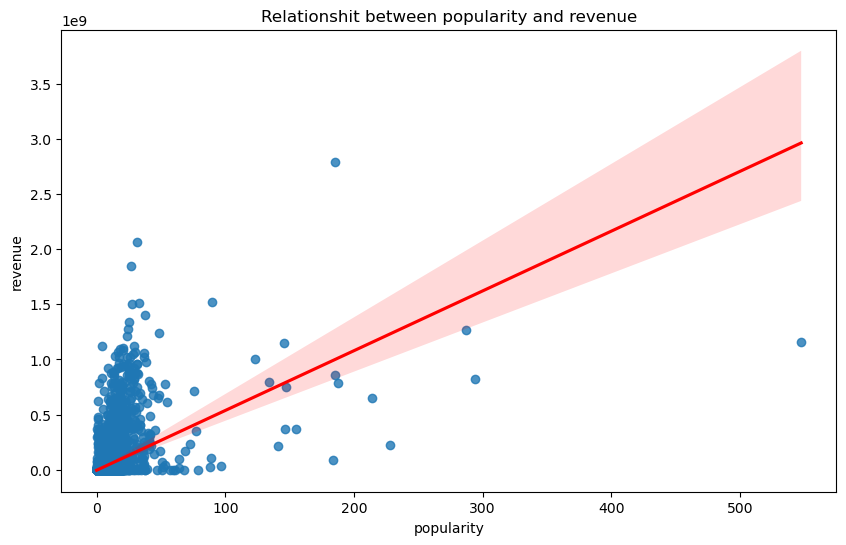

In [412]:
plt.figure(figsize=(10, 6))

sns.regplot(x=md['popularity'], y=md['revenue'], line_kws={'color': 'r'})

plt.title(f'Relationshit between popularity and revenue')

plt.show()

## Is there a **Linear Correlation** between popularity and runtime ? 

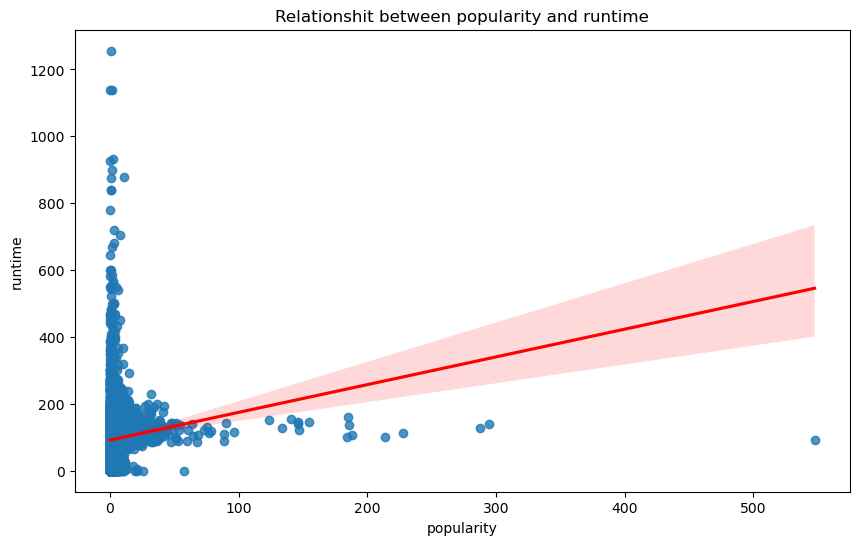

In [415]:
plt.figure(figsize=(10, 6))

sns.regplot(x=md['popularity'], y=md['runtime'], line_kws={'color': 'r'})

plt.title(f'Relationshit between popularity and runtime')

plt.show()